In [1]:
from astropy.io import fits
import numpy as np
from astropy import stats 
import matplotlib.pyplot as plt

In [ ]:
hdu1_data = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic5332/hst/ic5332_uvis_f658n_exp_drc_sci.fits')[0]
hdu1_var = fits.open('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ic5332/hst/ic5332_uvis_f658n_err_drc_wht.fits')[0]
hdu1_err = hdu1_var.copy()
hdu1_err.data = np.sqrt(1./hdu1_err.data) 

/var/folders/3y/cmsgt3_x7x72bbs__zhy_q6h0008wr/T/ipykernel_6344/4186776617.py:4: RuntimeWarning: divide by zero encountered in true_divide
  hdu1_err.data = np.sqrt(1/hdu1_err.data)


In [41]:
# hdu1_data.writeto('tmp_data.fits', overwrite=True) 
# hdu1_err.writeto('tmp_err.fits', overwrite=True)

In [3]:
hdu1_data.data[hdu1_data.data == 0] = np.nan
hdu1_err.data[hdu1_err.data == 0] = np.nan

In [40]:
mean_err = np.nanmean(hdu1_err.data[(np.isfinite(hdu1_err.data))])
mean_data = np.nanmean(hdu1_data.data[(np.isfinite(hdu1_data.data))])

median_err = np.nanmedian(hdu1_err.data[np.isfinite(hdu1_err.data)])
median_data = np.nanmedian(hdu1_data.data[np.isfinite(hdu1_data.data)])

std_err = np.nanstd(hdu1_err.data[(np.isfinite(hdu1_err.data))])
madstd_err = stats.mad_std(hdu1_err.data[np.isfinite(hdu1_err.data)], ignore_nan=True)

std_data = np.nanstd(hdu1_data.data[(np.isfinite(hdu1_data.data))])
madstd_data = stats.mad_std(hdu1_data.data[np.isfinite(hdu1_data.data)], ignore_nan=True)

print('Mean error: ', mean_err)
# print('Mean data: ', mean_data)
# print('Median error: ', median_err)
# print('Median data: ', median_err)
# print('Std error: ', std_err)
# print('Std data: ', std_data)
# print('MAD std error: ', madstd_err)
print('MAD std data: ', madstd_data)

Mean error:  0.006163264
MAD std data:  0.0037500249163046066


props:  [ 0.99492768  0.00366828 -0.00371037]


(-0.02, 0.02)

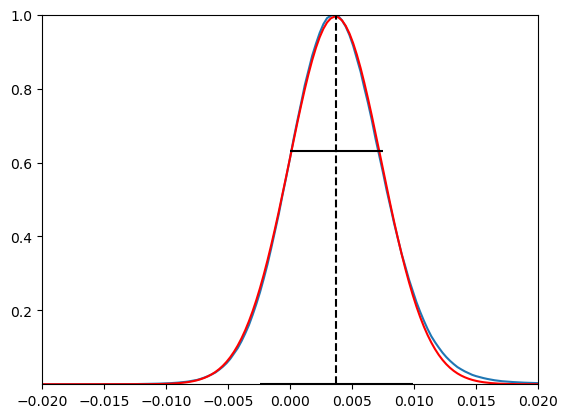

In [39]:
from scipy.optimize import curve_fit
def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

hist = np.histogram(hdu1_data.data[np.isfinite(hdu1_data.data)], bins=np.linspace(-0.1, 0.2, 1000))

hist_x = hist[1][1:]
hist_y = hist[0]
hist_y = hist_y/np.nanmax(hist_y)

popt, pcov = curve_fit(gauss, hist_x, hist_y, p0=[1, 0, 0.1])

plt.plot(hist_x, hist_y)
plt.plot(hist_x, gauss(hist_x, *popt), color='red')

plt.vlines(mean_data, 0, 1, color='black', ls='--')


# plt.hlines(1e-4, mean_data-std_data/2, mean_data+std_data/2, color='black', ls='-')
plt.hlines(0.63, mean_data-madstd_data, mean_data+madstd_data, color='black', ls='-')
plt.hlines(1e-6, mean_data-mean_err, mean_data+mean_err, color='black', ls='-')

print('props: ', popt)

# plt.yscale('log')
plt.ylim(1e-8, 1)
# plt.xlim(-0.1, 0.2)
plt.xlim(-0.02, 0.02)

In [9]:
np.nanmean(hdu1_data.data[np.isfinite(hdu1_data.data)])

0.0037529373